# 1. scipy.optimize.root_scalar Practice

scipy.optimize.root_scalar(f, args=(), method=None, bracket=None, fprime=None, fprime2=None, x0=None, x1=None, xtol=None, rtol=None, maxiter=None, options=None)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
plt.rcParams.update({'font.size': 15})

In [6]:

from scipy import optimize
def f(x):
    return (x**3 - 2)

def df(x):
    return 3*x**2

sol = optimize.root_scalar(f, x0 = 1, fprime = df,
                         method = 'newton')

sol.root, sol.iterations, sol.function_calls


"\nfrom scipy import optimize\ndef f(x):\n    return (x**3 - 2)\n\ndef df(x):\n    return 3*x**2\n\nsol = optimize.root_scalar(f, x0 = 1, fprime = df,\n                         method = 'newton')\n\nsol.root, sol.iterations, sol.function_calls\n"

In [3]:
f(2)

6

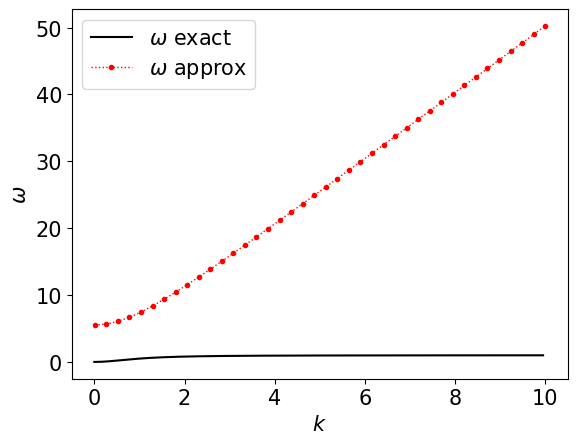

In [7]:
ks = np.linspace(0.01, 10, 40)
ws = [ks[0]]

def f(x): 
    c, wp, wc = 5, 5, 1
    f = c**2 * k**2 - x**2 + wp**2/(1 - wc/x)
    return f

def df(x) :
    c, wp, wc = 5, 5, 1
    df = -2*x - wp**2 * wc/(x - wc)**2
    return df


for k in ks:
    sol = optimize.root_scalar(f, x0 = 2, fprime= df, 
                         method = 'newton')
    ws.append(sol.root)
    
ws = ws[1:]

w_exact = np.linspace(1e-10, 0.99, 400)
k_exact = 1/5 * np.sqrt(w_exact**2 - 5**2/(1 - 1/w_exact))

plt.figure()
plt.plot(k_exact, w_exact, "-k", label = "$\\omega$ exact")
plt.plot(ks, ws, ".:r", linewidth = 1, label = "$\\omega$ approx")
plt.xlabel("$k$")
plt.ylabel("$\\omega$")
plt.legend()
plt.show()

In [5]:
'''
def f(x): 
    c, wp, wc = 5, 5, 1
    f = c**2 * k**2 - x**2 + wp**2/(1 - wc/x)
    return f


def df(x) :
    c, wp, wc = 5, 5, 1
    df = -2*x - wp**2 * wc/(x - wc)**2
    return df


sol = optimize.root_scalar(lambda w: f(x), x0 = 1.00000000e-05, fprime = lambda w: df(x), 
                         method = 'newton')

sol.root, sol.iterations, sol.function_calls
'''

"\ndef f(x): \n    c, wp, wc = 5, 5, 1\n    f = c**2 * k**2 - x**2 + wp**2/(1 - wc/x)\n    return f\n\n\ndef df(x) :\n    c, wp, wc = 5, 5, 1\n    df = -2*x - wp**2 * wc/(x - wc)**2\n    return df\n\n\nsol = optimize.root_scalar(lambda w: f(x), x0 = 1.00000000e-05, fprime = lambda w: df(x), \n                         method = 'newton')\n\nsol.root, sol.iterations, sol.function_calls\n"